In [1]:
import pandas as pd
import numpy as np

C:\Users\AKBAR\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("pre-owned cars.csv")

In [4]:
df.head()

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
me

In [6]:
df['spare_key'].value_counts()

No     2052
Yes     753
Name: spare_key, dtype: int64

In [7]:
df[df['transmission'].isnull()] #not enough info lets drop this row

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
2805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1883558000,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop(2805,axis=0,inplace=True)

In [9]:
df['transmission'].isnull().sum()

0

In [10]:
df['spare_key']=df['spare_key'].apply(lambda Yes: 1 if Yes else 0)

In [11]:
df.head()

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,1,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,1,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,1,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,1,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,1,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [12]:
#Before converting other columns lets check null values of the columns

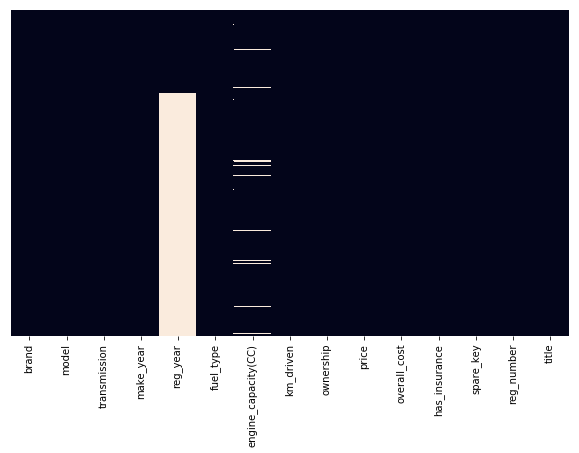

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [14]:
df.drop('reg_year',axis=1,inplace=True)

In [15]:
df['engine_capacity(CC)'].isnull().sum()

117

In [16]:
#lets replace missing values with null values handling methods such as mean median and mode

In [17]:
df['engine_capacity(CC)']=df['engine_capacity(CC)'].fillna(df['engine_capacity(CC)'].median())

In [18]:
df['engine_capacity(CC)'].isnull().sum()

0

In [19]:
df.isnull().sum()

brand                  0
model                  0
transmission           0
make_year              0
fuel_type              0
engine_capacity(CC)    0
km_driven              0
ownership              0
price                  0
overall_cost           0
has_insurance          0
spare_key              0
reg_number             0
title                  0
dtype: int64

In [20]:
#No missing values lets keep normalizing the columns

In [21]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [22]:
df['transmission']=df['transmission'].apply(lambda Manual: 1 if Manual else 0)

In [23]:
df.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,1,2020.0,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,1,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,1,2018.0,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,1,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,1,2022.0,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,1,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,1,2023.0,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,1,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,1,2021.0,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,1,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [24]:
df['ownership'].unique()

array(['1st owner', '2nd owner', '3rd owner'], dtype=object)

In [25]:
df = pd.get_dummies(df, columns=['ownership'], drop_first=True)

In [26]:
df.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,price,overall_cost,has_insurance,spare_key,reg_number,title,ownership_2nd owner,ownership_3rd owner
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,1,2020.0,Diesel,2184.0,11003.0,1231000,23431.0,True,1,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE,0,0
1,Hyundai,Verna 1.6 VTVT SX,1,2018.0,Petrol,1591.0,66936.0,786000,15359.0,True,1,DL7C,2018 Hyundai Verna 1.6 VTVT SX,0,0
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,1,2022.0,Diesel,1956.0,27990.0,1489000,28349.0,True,1,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...,0,0
3,Honda,City 1.5L I-VTE V CVT,1,2023.0,Petrol,1498.0,5061.0,1227000,23355.0,True,1,DL4C,2023 Honda City 1.5L I-VTE V CVT,0,0
4,Ford,Ecosport TITANIUM 1.5L DIESEL,1,2021.0,Diesel,1498.0,23480.0,887000,16883.0,True,1,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL,0,0


In [27]:
df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)

In [28]:
df.head(3)

,brand,model,transmission,make_year,engine_capacity(CC),km_driven,price,overall_cost,has_insurance,spare_key,reg_number,title,ownership_2nd owner,ownership_3rd owner,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,1,2020.0,2184.0,11003.0,1231000,23431.0,True,1,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE,0,0,1,0,0
1,Hyundai,Verna 1.6 VTVT SX,1,2018.0,1591.0,66936.0,786000,15359.0,True,1,DL7C,2018 Hyundai Verna 1.6 VTVT SX,0,0,0,0,1
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,1,2022.0,1956.0,27990.0,1489000,28349.0,True,1,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...,0,0,1,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2804
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   int64  
 3   make_year            2805 non-null   float64
 4   engine_capacity(CC)  2805 non-null   float64
 5   km_driven            2805 non-null   float64
 6   price                2805 non-null   int64  
 7   overall_cost         2805 non-null   float64
 8   has_insurance        2805 non-null   object 
 9   spare_key            2805 non-null   int64  
 10  reg_number           2805 non-null   object 
 11  title                2805 non-null   object 
 12  ownership_2nd owner  2805 non-null   uint8  
 13  ownership_3rd owner  2805 non-null   uint8  
 14  fuel_type_Diesel     2805 non-null   uint8  
 15  fuel_type_Electric   2805 non-null   u

In [30]:
#most of the conversion is done lets try machine learning models and some basic visualizations to understand data

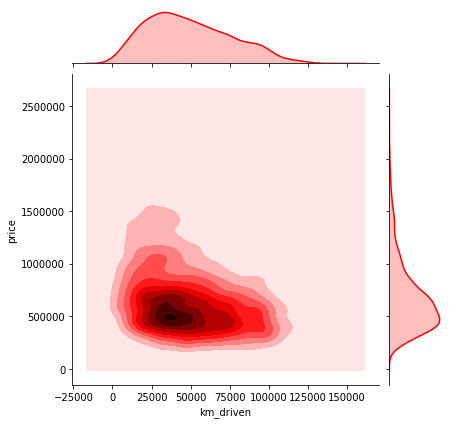

In [31]:
sns.jointplot(y='price',x='km_driven',data=df,kind='kde',color='red')

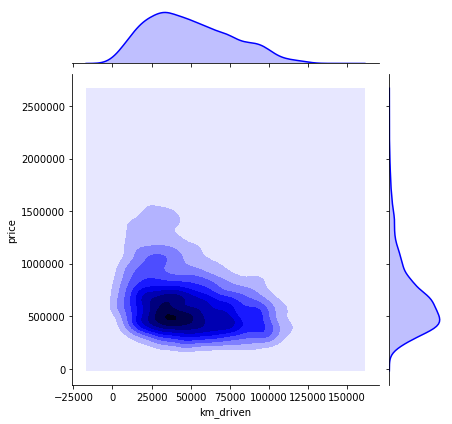

In [32]:
sns.jointplot(x='km_driven',y='price',data=df,kind='kde',color='blue')

In [33]:
#most of them price around 500000

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df.columns

Index(['brand', 'model', 'transmission', 'make_year', 'engine_capacity(CC)',
       'km_driven', 'price', 'overall_cost', 'has_insurance', 'spare_key',
       'reg_number', 'title', 'ownership_2nd owner', 'ownership_3rd owner',
       'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol'],
      dtype='object')

In [36]:
X=df[['transmission', 'make_year', 'engine_capacity(CC)','km_driven', 'overall_cost','spare_key',
      'ownership_2nd owner', 'ownership_3rd owner',
      'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol']]

In [37]:
y=df['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
from sklearn.linear_model import LinearRegression

In [40]:
lm=LinearRegression()

In [41]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
predictions=lm.predict(X_test)

In [43]:
lm.intercept_

-47951864.39431637

In [44]:
coeff=lm.coef_

In [45]:
df_coef=pd.DataFrame(coeff,X.columns,columns=['Coefficient'])

In [46]:
df_coef

,Coefficient
transmission,0.000000e+00
make_year,2.369710e+04
engine_capacity(CC),1.002188e+02
km_driven,1.135471e-01
overall_cost,4.535497e+01
spare_key,3.637979e-12
ownership_2nd owner,-1.894707e+03
ownership_3rd owner,7.789201e+03
fuel_type_Diesel,2.085883e+04
fuel_type_Electric,7.386675e+04


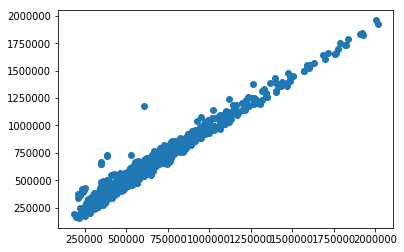

In [47]:
plt.scatter(y_test,predictions)

In [48]:
from sklearn import metrics

In [49]:
metrics.mean_absolute_error(y_test,predictions)

42314.93457282097

In [50]:
metrics.mean_squared_error(y_test,predictions)

3471056447.325158

In [51]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

58915.67234043212

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
X=df[['make_year', 'engine_capacity(CC)',
       'km_driven', 'price', 'overall_cost', 'has_insurance', 'spare_key', 'ownership_2nd owner', 'ownership_3rd owner',
       'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol']]
Y=df['transmission']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dtree = DecisionTreeClassifier()

In [55]:
dtree.fit(X_train,y_train)

C:\Users\AKBAR\Anaconda\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
pred=dtree.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      178000       0.00      0.00      0.00         0
      184000       0.00      0.00      0.00         1
      197000       0.00      0.00      0.00         1
      206000       0.00      0.00      0.00         0
      209000       1.00      0.50      0.67         2
      212000       0.00      0.00      0.00         1
      214000       0.00      0.00      0.00         0
      216000       1.00      1.00      1.00         1
      219000       1.00      1.00      1.00         1
      220000       0.00      0.00      0.00         1
      222000       0.00      0.00      0.00         0
      223000       0.00      0.00      0.00         2
      229000       0.00      0.00      0.00         0
      231000       0.00      0.00      0.00         2
      232000       0.00      0.00      0.00         0
      234000       0.00      0.00      0.00         1
      236000       0.00      0.00      0.00         1
      239000       0.00    

C:\Users\AKBAR\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AKBAR\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\AKBAR\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AKBAR\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\AKBAR\Anaconda\lib\site-pac

In [59]:
confusion_matrix(y_test,pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
X=df[['transmission', 'make_year', 'engine_capacity(CC)','km_driven', 'overall_cost','spare_key',
      'ownership_2nd owner', 'ownership_3rd owner',
      'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol']]

In [64]:
y=df['price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
rf = RandomForestRegressor(n_estimators=500)

In [67]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
predictions=rf.predict(X_test)

C:\Users\AKBAR\Anaconda\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [71]:
from sklearn.metrics import r2_score

In [72]:
print(r2_score(y_test,predictions))

0.9961851269659869


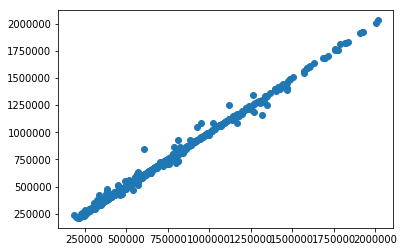

In [73]:
plt.scatter(y_test,predictions)